<a href="https://colab.research.google.com/github/jae-gyeong/deep-learning/blob/master/20190920fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 헬퍼(helper) 라이브러리를 임포트
import numpy as np
import matplotlib.pyplot as plt



print(tf.__version__)

1.14.0


Using TensorFlow backend.


# 1. 데이터 셋 설정하기

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(tr_image, tr_label), (te_image, te_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
label_name = ['Top', 'Pants', 'Pullover', 'Dress', 'Coat',
               'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Shose']

In [0]:
tr_image.shape

(60000, 28, 28)

In [0]:
tr_label.shape

(60000,)

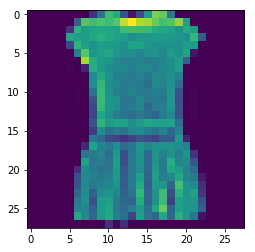

In [0]:

plt.figure()
plt.imshow(tr_image[3])

plt.show()


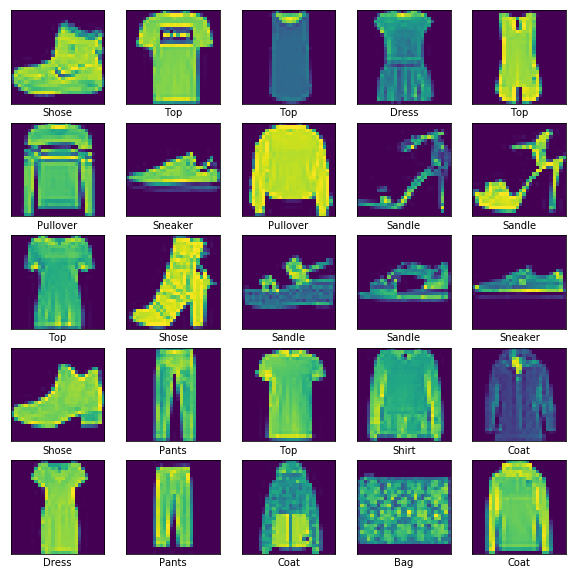

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tr_image[i])
    plt.xlabel(label_name[tr_label[i]])
plt.show()

In [0]:
tr_image = tr_image.reshape(60000, 784).astype('float32') / 255.0                 # 입력 28 * 28 = 784 
te_image = te_image.reshape(10000, 784).astype('float32') / 255.0

In [0]:
tr_label = np_utils.to_categorical(tr_label)
te_label = np_utils.to_categorical(te_label)

In [0]:
tr_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
val_image = tr_image[50000:]        #60000개인거 50000으로 자른거
val_label = tr_label[50000:]
tr_image = tr_image[:50000]
tr_label = tr_label[:50000]

In [0]:
val_image.shape        # 위에 잘린 만개의 값

(10000, 784)

In [0]:
tr_rand= np.random.choice(50000, 700)
val_rand = np.random.choice(10000, 300)

In [0]:
tr_image = tr_image[tr_rand]
tr_label = tr_label[tr_rand]
val_image = val_image[val_rand]
val_label= val_label[val_rand]

# 2. 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation= 'relu'))
model.add(Dense(64,  activation= 'relu'))
model.add(Dense(units=10, activation= 'softmax'))

# 3. 모델 학습과정 설정하기

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습과정 살펴보기

### ctrl + b+ m 코드 추가
### ctrl + m+m 텍스트 추가
###  ctrl+a+m 위로 (above) below(밑)

In [0]:
hist = model.fit(tr_image, tr_label, epochs=100, batch_size=32, validation_data=(val_image, val_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 1s 978us/step - loss: 2.2017 - acc: 0.2200 - val_loss: 2.0540 - val_acc: 0.3167
Epoch 2/100
700/700 [==============================] - 0s 62us/step - loss: 1.9506 - acc: 0.4086 - val_loss: 1.8480 - val_acc: 0.4433
Epoch 3/100
700/700 [==============================] - 0s 61us/step - loss: 1.7541 - acc: 0.4943 - val_loss: 1.6772 - val_acc: 0.4900
Epoch 4/100
700/700 [==============================] - 0s 65us/step - loss: 1.5781 - acc: 0.5143 - val_loss: 1.5321 - val_acc: 0.5233
Epoch 5/100
700/700 [==============================] - 0s 72us/step - loss: 1.4262 - acc: 0.5900 - val_loss: 1.3984 - val_acc: 0.5667
Epoch 6/100
700/700 [==============================] - 0s 58us/step - loss: 1.2940 - acc: 0.6429 - val_loss: 1.3059 - val_acc: 0.6133
Epoch 7/100
700/700 [==============================] -

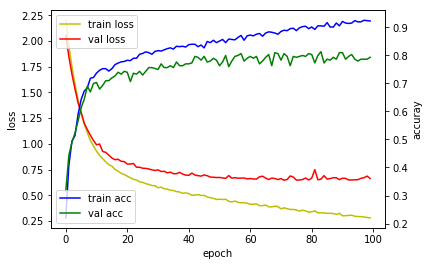

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [0]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[2.2017490128108435, 1.9505762243270874, 1.754127381188529, 1.5780931350163052, 1.4261530433382308, 1.2939847660064698, 1.1925952700206213, 1.1111590065274919, 1.0318576734406608, 0.9791065328461783, 0.9277443490709577, 0.8884791731834412, 0.8567332366534642, 0.8244062355586461, 0.7978419753483363, 0.7834547846657889, 0.7513047555514745, 0.7345293491227286, 0.7137032188688006, 0.7029652530806405, 0.6856195500918797, 0.6698380875587463, 0.6553982445171901, 0.6487550810405186, 0.6305565599032811, 0.6260607630865914, 0.6132828940664019, 0.6057191749981471, 0.5948004872458321, 0.5929086984906877, 0.5736333973067147, 0.5795466429846627, 0.5631367036274502, 0.5604462107590267, 0.5483619724001203, 0.54659850529262, 0.5356355808462415, 0.5324617431844983, 0.5187737238407135, 0.5235277969496591, 0.5167303303309849, 0.5009153100422451, 0.5022927689552307, 0.5064223056180136, 0.4983544261114938, 0.499047372341156, 0.4839965660231454, 0.476859884262085, 0.47036162785121

# 6.모델 평가하기

In [0]:
loss_and_acc = model.evaluate(te_image, te_label, batch_size=32)
print('## evaluation  ##')
print(loss_and_acc)

10000/10000 [==============================] - 0s 22us/step
## evaluation  ##
[0.6474012638092042, 0.7773]


# 7. 모델 사용하기

In [0]:
xhat = te_image
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[3.5126413e-05 3.6113186e-06 2.3299322e-04 ... 2.2642182e-01
  2.1973880e-02 6.3813031e-01]
 [2.3453065e-06 1.4697010e-05 9.9734586e-01 ... 9.4146461e-12
  2.7520691e-06 2.1605686e-08]
 [1.4403079e-05 9.9961084e-01 1.5116021e-05 ... 9.5215196e-09
  1.3720223e-06 7.9070773e-08]
 ...
 [8.0222256e-02 9.4755314e-04 9.8966900e-03 ... 3.1877411e-04
  5.5350649e-01 2.6900247e-03]
 [2.2571832e-04 9.5447004e-01 4.5966968e-04 ... 9.9396834e-07
  1.5058417e-05 2.3663843e-05]
 [2.7031530e-04 2.3359396e-04 3.2264325e-03 ... 9.7176239e-02
  6.0993247e-02 5.0498806e-02]]


In [0]:
te_image.shape

(10000, 784)

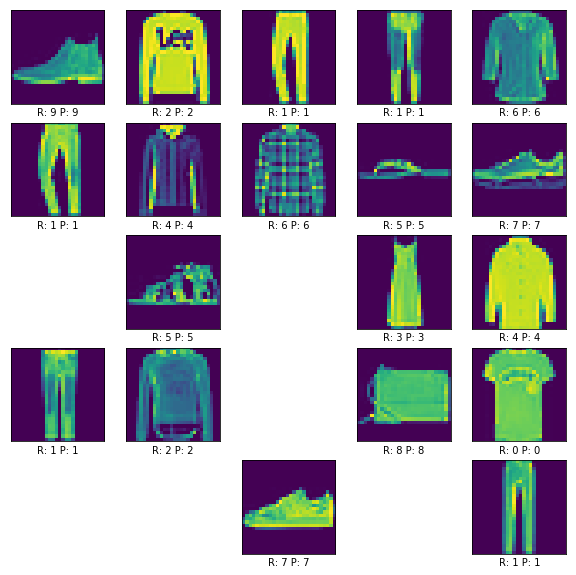

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()

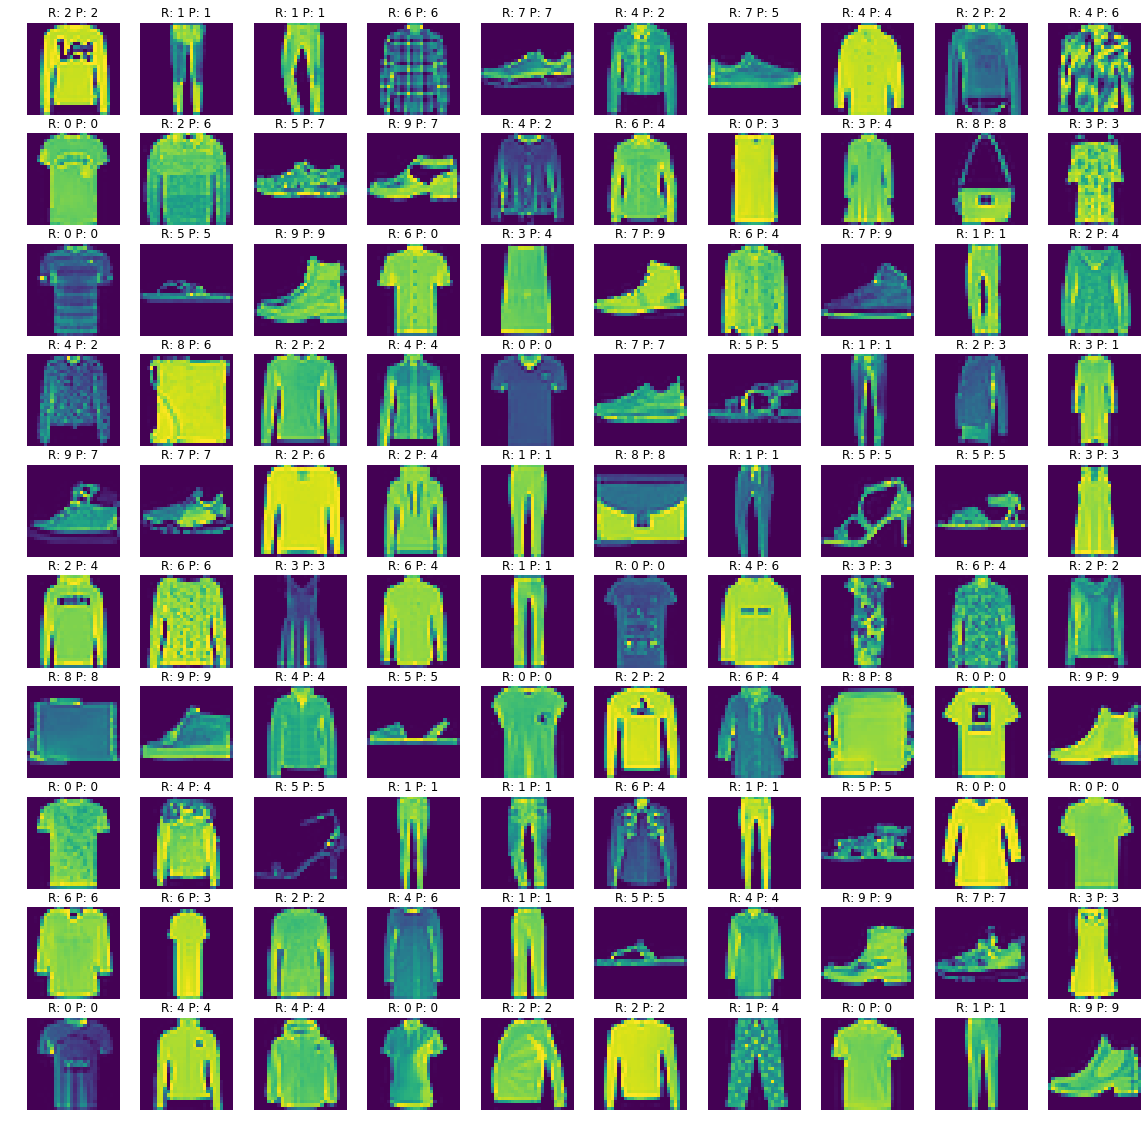

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



plt_row = 10
plt_col = 10

plt.rcParams["figure.figsize"] = (20,20)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):

    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        i += 1
      # continue
    
    sub_plt=axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(te_image[i].reshape(28, 28))
    sub_plt_title = 'R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()